In [148]:
#"C:\Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\Customer Purchases"
import os
for dirname, _, filenames in os.walk('C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Loan Default Dataset.txt
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\LoanDefault.ipynb
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\LoanDefaultv1.ipynb
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Loan_Default.csv
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Loan_Default_Cleaned.csv
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Loan_Default_Cleanedwork temp.xlsx
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Tipos de variables.xlsx


In [219]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

path_archivos='C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault'

In [149]:
print (filenames)

['Loan Default Dataset.txt', 'LoanDefault.ipynb', 'LoanDefaultv1.ipynb', 'Loan_Default.csv', 'Loan_Default_Cleaned.csv', 'Loan_Default_Cleanedwork temp.xlsx', 'Tipos de variables.xlsx']


In [32]:
#advertencia de las lineas qe no carga
df=pd.read_csv("C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\loan_default.csv",sep=',', on_bad_lines='warn')


In [150]:
#lineas erradas que no carga. 
df=pd.read_csv("C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\loan_default.csv", sep=',', on_bad_lines='skip')

In [151]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [152]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

## Limpieza y Preparación de Datos
### Eliminación de Columnas No Útiles
Identificaremos las columnas que no contribuyen a nuestro análisis o entrenamiento del modelo. Estas podrían ser columnas con un solo valor único, un alto porcentaje de valores faltantes, o información irrelevante (por ejemplo, identificadores).

### Manejo de Valores Faltantes
Los valores faltantes se pueden manejar de diversas maneras dependiendo de la naturaleza de los datos y la extensión de los valores faltantes. Las estrategias comunes incluyen:

Eliminar filas o columnas con valores faltantes.
- Imputar valores faltantes usando la media, mediana para datos numéricos.
- Usar un valor constante o el valor más frecuente para datos categóricos.

### Conversión de Columans con tipos de datos String a numéricos
Se convierte estas columnas a formato numérico usando pd.to_numeric. Si hay valores no numéricos, los manejaremos adecuadamente (por ejemplo, reemplazándolos con NaN).

In [153]:
# Verificar los tipos de datos de las columnas
print(datos.dtypes)

# Paso 2: Convertir columnas a números
columnas_a_convertir = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']

# Convertir y manejar errores (valores no convertibles serán NaN)
for columna in columnas_a_convertir:
    datos[columna] = pd.to_numeric(datos[columna], errors='coerce')

# Verificar las conversiones
print(datos.dtypes)
print(datos[columnas_a_convertir].head())

loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object
submission_of_application     object
L

In [154]:
#  Eliminación de Columnas No Útiles
# Verificar columnas con un solo valor único o alto porcentaje de valores faltantes
conteo_unicos = df.nunique()
porcentaje_faltantes = df.isnull().mean() * 100

print("Conteo de valores únicos por columna:\n", conteo_unicos)
print("\nPorcentaje de valores faltantes por columna:\n", porcentaje_faltantes)

Conteo de valores únicos por columna:
 ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type 

In [155]:
# Criterios de eliminación de columnas:
# - Columnas con un solo valor único
# - Columnas con más del 50% de valores faltantes
columnas_a_eliminar = conteo_unicos[conteo_unicos == 1].index.tolist() + porcentaje_faltantes[porcentaje_faltantes > 50].index.tolist()

# Eliminar estas columnas
datos_limpios = df.drop(columns=columnas_a_eliminar)

print("\nColumnas eliminadas: ", columnas_a_eliminar)
print("\nDatos después de eliminar columnas:")
print(datos_limpios.info())


Columnas eliminadas:  ['year']

Datos después de eliminar columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges  

In [156]:
# Verificar los tipos de datos de las columnas
print(datos_limpios.dtypes)

# Paso 2: Convertir columnas a números
columnas_a_convertir = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges','term','property_value','income','LTV','dtir1']

# Convertir y manejar errores (valores no convertibles serán NaN)
for columna in columnas_a_convertir:
    datos_limpios[columna] = pd.to_numeric(datos_limpios[columna], errors='coerce')

# Verificar las conversiones
print(datos_limpios.dtypes)
print(datos_limpios[columnas_a_convertir].head())

ID                             int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object
s

In [157]:
# Eliminar la columna  ID
datos_limpios.drop(columns=["ID"])

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [158]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       14

In [159]:
#  Manejo de Valores Faltantes
# Para columnas numéricas, llenar valores faltantes con la mediana
columnas_numericas = datos_limpios.select_dtypes(include='number').columns
datos_limpios[columnas_numericas] = datos_limpios[columnas_numericas].fillna(datos_limpios[columnas_numericas].median())

# Para columnas categóricas, llenar valores faltantes con la moda
columnas_categoricas = datos_limpios.select_dtypes(include='object').columns
datos_limpios[columnas_categoricas] = datos_limpios[columnas_categoricas].apply(lambda x: x.fillna(x.mode()[0]))

print("\nDatos después de llenar valores faltantes:")
print(datos_limpios.info())


Datos después de llenar valores faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   loan_limit                 148670 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              148670 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148670 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           148670 non-null  float64
 11  Interest_rate_spread       148670 non-null  float64
 12  Upfront_charges            148670 non-null

In [160]:
# Mostrar las primeras filas del conjunto de datos y los nombres de las columnas
print(datos_limpios.head())
print(datos_limpios.columns)

# Eliminar la columna ID si existe
if 'ID' in datos_limpios.columns:
    datos_limpios = datos_limpios.drop(columns=['ID'])
    print("Columna 'ID' eliminada.")
else:
    print("Columna 'ID' no encontrada.")

# Mostrar las primeras filas después de eliminar la columna ID
print(datos_limpios.head())



      ID loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0  24890         cf  Sex Not Available         nopre     type1           p1   
1  24891         cf               Male         nopre     type2           p1   
2  24892         cf               Male           pre     type1           p1   
3  24893         cf               Male         nopre     type1           p4   
4  24894         cf              Joint           pre     type1           p1   

  Credit_Worthiness open_credit business_or_commercial  loan_amount  ...  \
0                l1        nopc                  nob/c       116500  ...   
1                l1        nopc                    b/c       206500  ...   
2                l1        nopc                  nob/c       406500  ...   
3                l1        nopc                  nob/c       456500  ...   
4                l1        nopc                  nob/c       696500  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0  

### Renombrar las columnas para mejor entendimiento. 

In [161]:
# Renombrar la columna 'LTV' a 'LoanToValueProperty'
datos_limpios.rename(columns={'LTV': 'LoanToValueProperty'}, inplace=True)
datos_limpios.rename(columns={'dtir1': 'DebToIncomeRatio'}, inplace=True)


## Guardar el nuevo Dataset Limpio y tratado

In [162]:
# Guardar el conjunto de datos limpio
ruta_archivo_limpio = 'C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned.csv'
datos_limpios.to_csv(ruta_archivo_limpio, index=False)

print(f"Datos limpios guardados en {ruta_archivo_limpio}")

Datos limpios guardados en C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned.csv


## Justificaciones:
### Eliminación de Columnas No Útiles:

- Columnas con un Solo Valor Único: Estas columnas no proporcionan variabilidad y, por lo tanto, no son útiles para el análisis o modelado, en este ejemplo la columan "ID" y "Year"
- Columnas con Alto Porcentaje de Valores Faltantes (>50%): Imputar estas columnas puede introducir sesgo significativo o ruido, por lo que es mejor eliminarlas., en este caso no tenemos columnas que cumplan con esta limitación. 
- Columna ID: Esta columna contiene valores únicos para identificar cada fila del conjunto de datos, pero no aporta información útil para la predicción del objetivo. Su presencia podría añadir ruido y afectar el rendimiento del modelo.
- Columna Year: Esta columna tiene solo un valor por lo que no resulta relevante.

### Manejo de Valores Faltantes:

- Columnas Numéricas: Llenar valores faltantes con la mediana es robusto ante valores atípicos y preserva la distribución de los datos.
- Columnas Categóricas: Llenar valores faltantes con la moda (valor más frecuente) asegura que la imputación sea consistente con la categoría más común en los datos.

### Conversión de Tipo de Datos
- Conversión de Cadenas a Números: Las columnas que representan valores numéricos deben ser convertidas a formato numérico para permitir cálculos y análisis correctos.
- Manejo de Errores: Usar pd.to_numeric con el parámetro errors='coerce' convierte los valores no numéricos a NaN, permitiendo su manejo posterior (por ejemplo, imputación de valores faltantes).

## Muestra del Dataset de los datos limpios y las primeras columnas con su informaicón 

In [163]:
print(datos_limpios.isnull().sum())  # Identify missing values in each column
datos_limpios.head()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LoanToValueProperty          0
Region                       0
Security_Type                0
Status                       0
DebToIncomeRatio             0
dtype: i

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LoanToValueProperty,Region,Security_Type,Status,DebToIncomeRatio
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,3.99,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,3.99,...,EQUI,552,EXP,55-64,to_inst,75.135870,North,direct,1,39.0
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


### Identificación de la Variable Objetivo 
- Predicción del Estado del Préstamo: La variable Status es crucial porque representa el resultado que estamos tratando de predecir. En un análisis de riesgo de crédito, por ejemplo, predecir si un préstamo será aprobado o caerá en incumplimiento (Defaulted) es fundamental.
- Evaluación de Modelos: Al construir modelos de clasificación, la precisión y otros métricas de rendimiento se evaluarán en función de la capacidad del modelo para predecir correctamente los valores de Status.

In [164]:
# Confirmar la variable objetivo 'Status' y revisar sus valores únicos
if 'Status' in datos_limpios.columns:
    print("\nVariable objetivo 'Status' encontrada.")
    print("Valores únicos en 'Status':", datos_limpios['Status'].unique())
else:
    print("\nVariable objetivo 'Status' no encontrada.")


Variable objetivo 'Status' encontrada.
Valores únicos en 'Status': [1 0]


## Gráfica de Variables

### Distribución de la Variable Objetivo (Status)

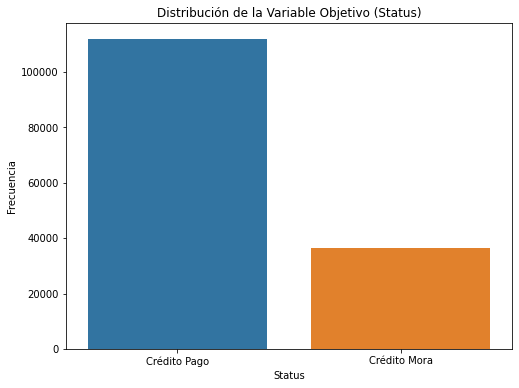

In [165]:
# Grafico de barras para la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=datos_limpios, x='Status')
plt.title('Distribución de la Variable Objetivo (Status)')
plt.xticks([0, 1], ['Crédito Pago', 'Crédito Mora'])
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.show()

### Distribución de las Variables Numéricas

Gráficas de las distribuciones de las variables Numéricas y de las variables Categóricas. 

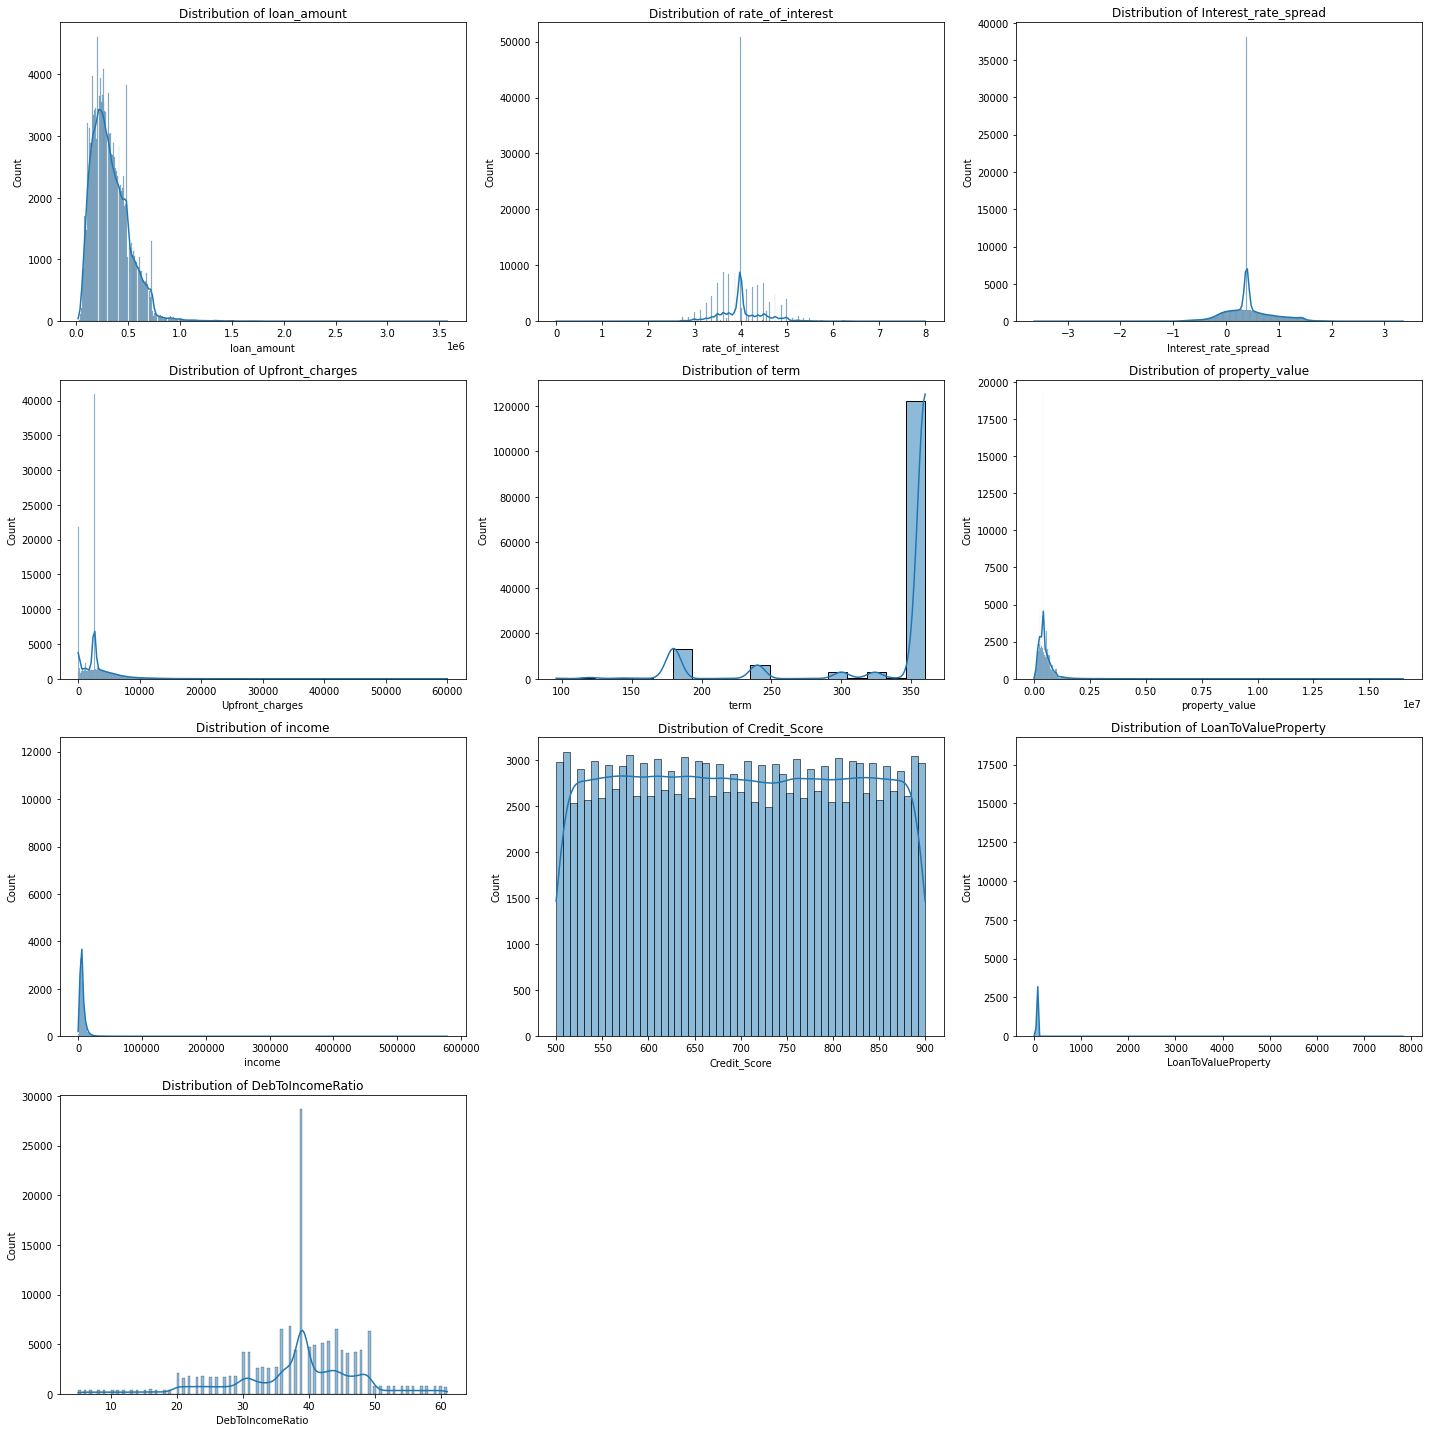

In [166]:
# Identificar características numéricas
variables_numericas = datos_limpios.select_dtypes(include=['float64', 'int64']).columns

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into features (X) and target (y)
X = datos_limpios.drop('Status', axis=1)
y = datos_limpios['Status'].astype(int)

# Combine X and y for visualization
data = X.copy()
data['Status'] = y

# Plot distributions of numerical features in a consolidated plot - CONSOLIDATED
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


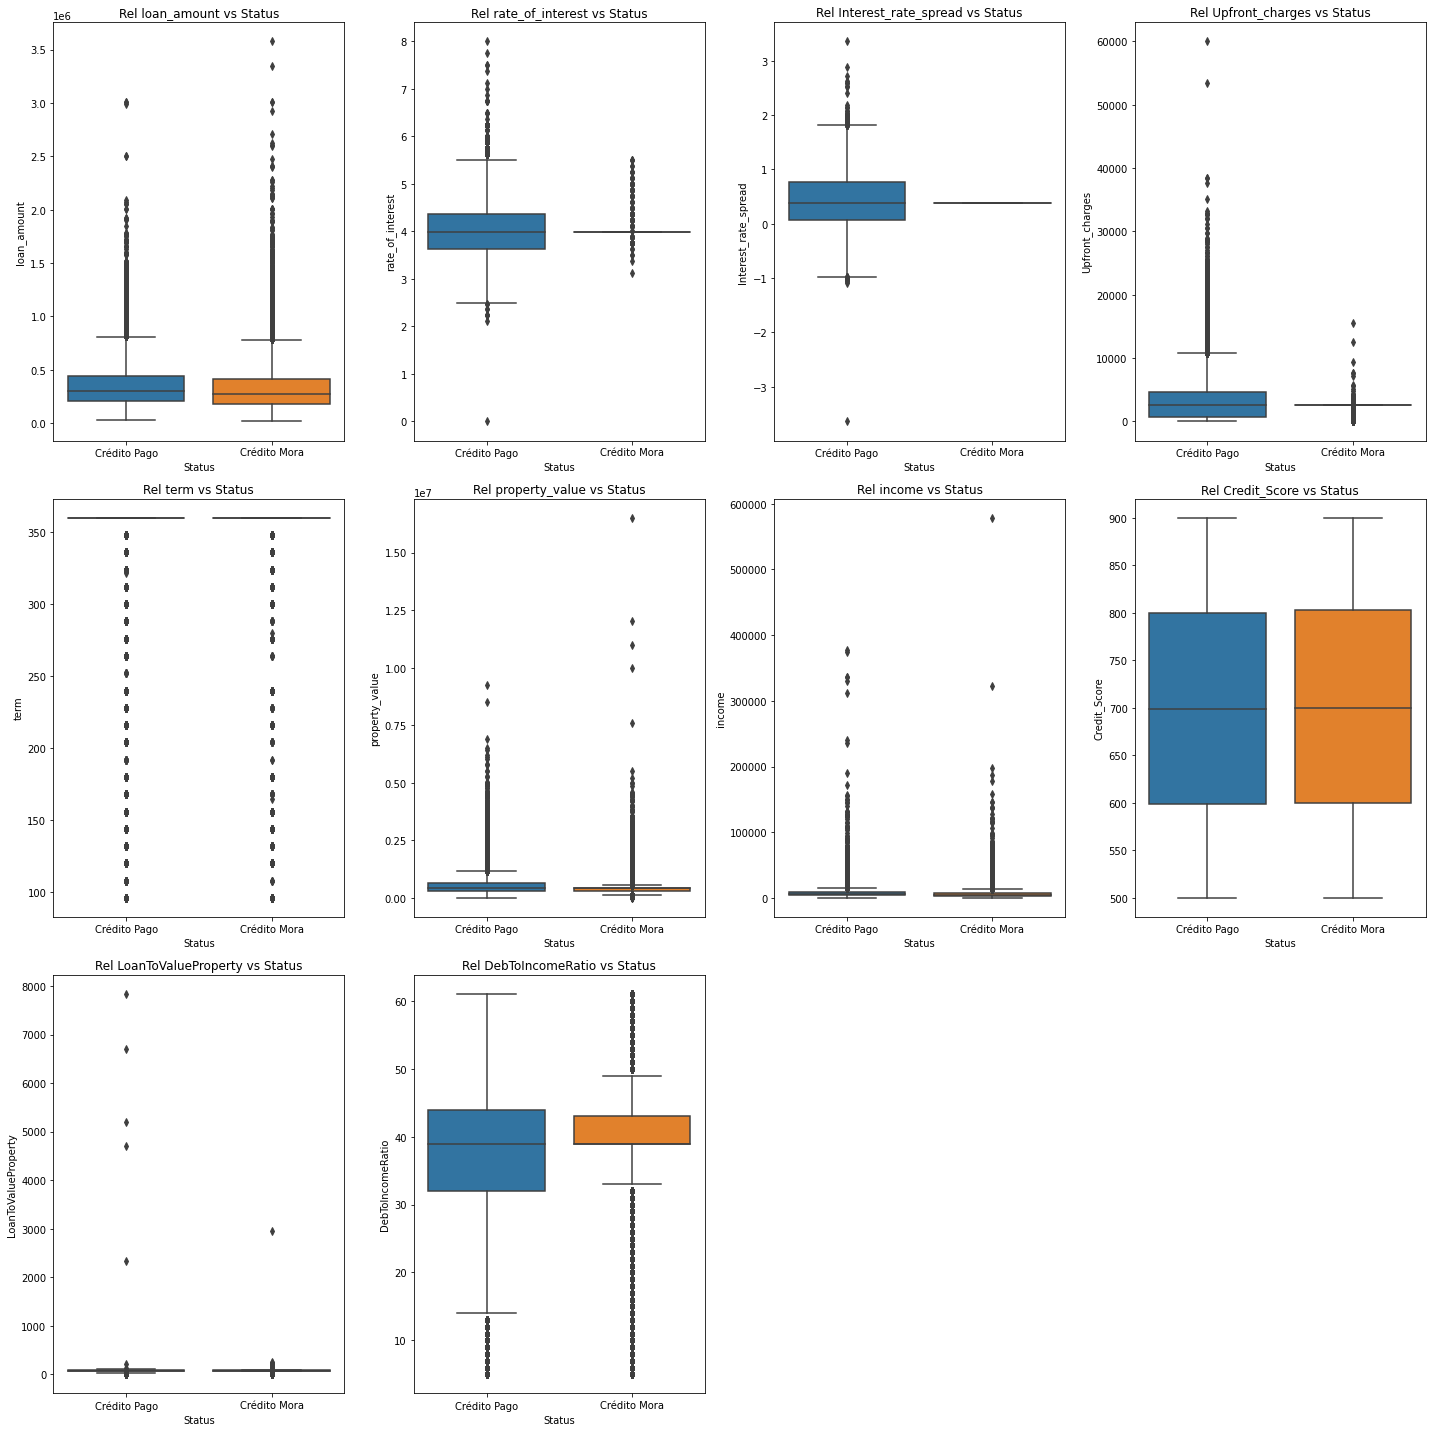

In [167]:
# Plot relationships between numerical features and target variable - CONSOLIDADO. 
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

# Plot relationships between numerical features and the target variable 'Status'

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='Status', y=col, data=datos_limpios)
    plt.title(f'Rel {col} vs Status')
    plt.xticks([0, 1], ['Crédito Pago', 'Crédito Mora'])
    plt.tight_layout()

plt.show()

<Figure size 1440x2520 with 0 Axes>

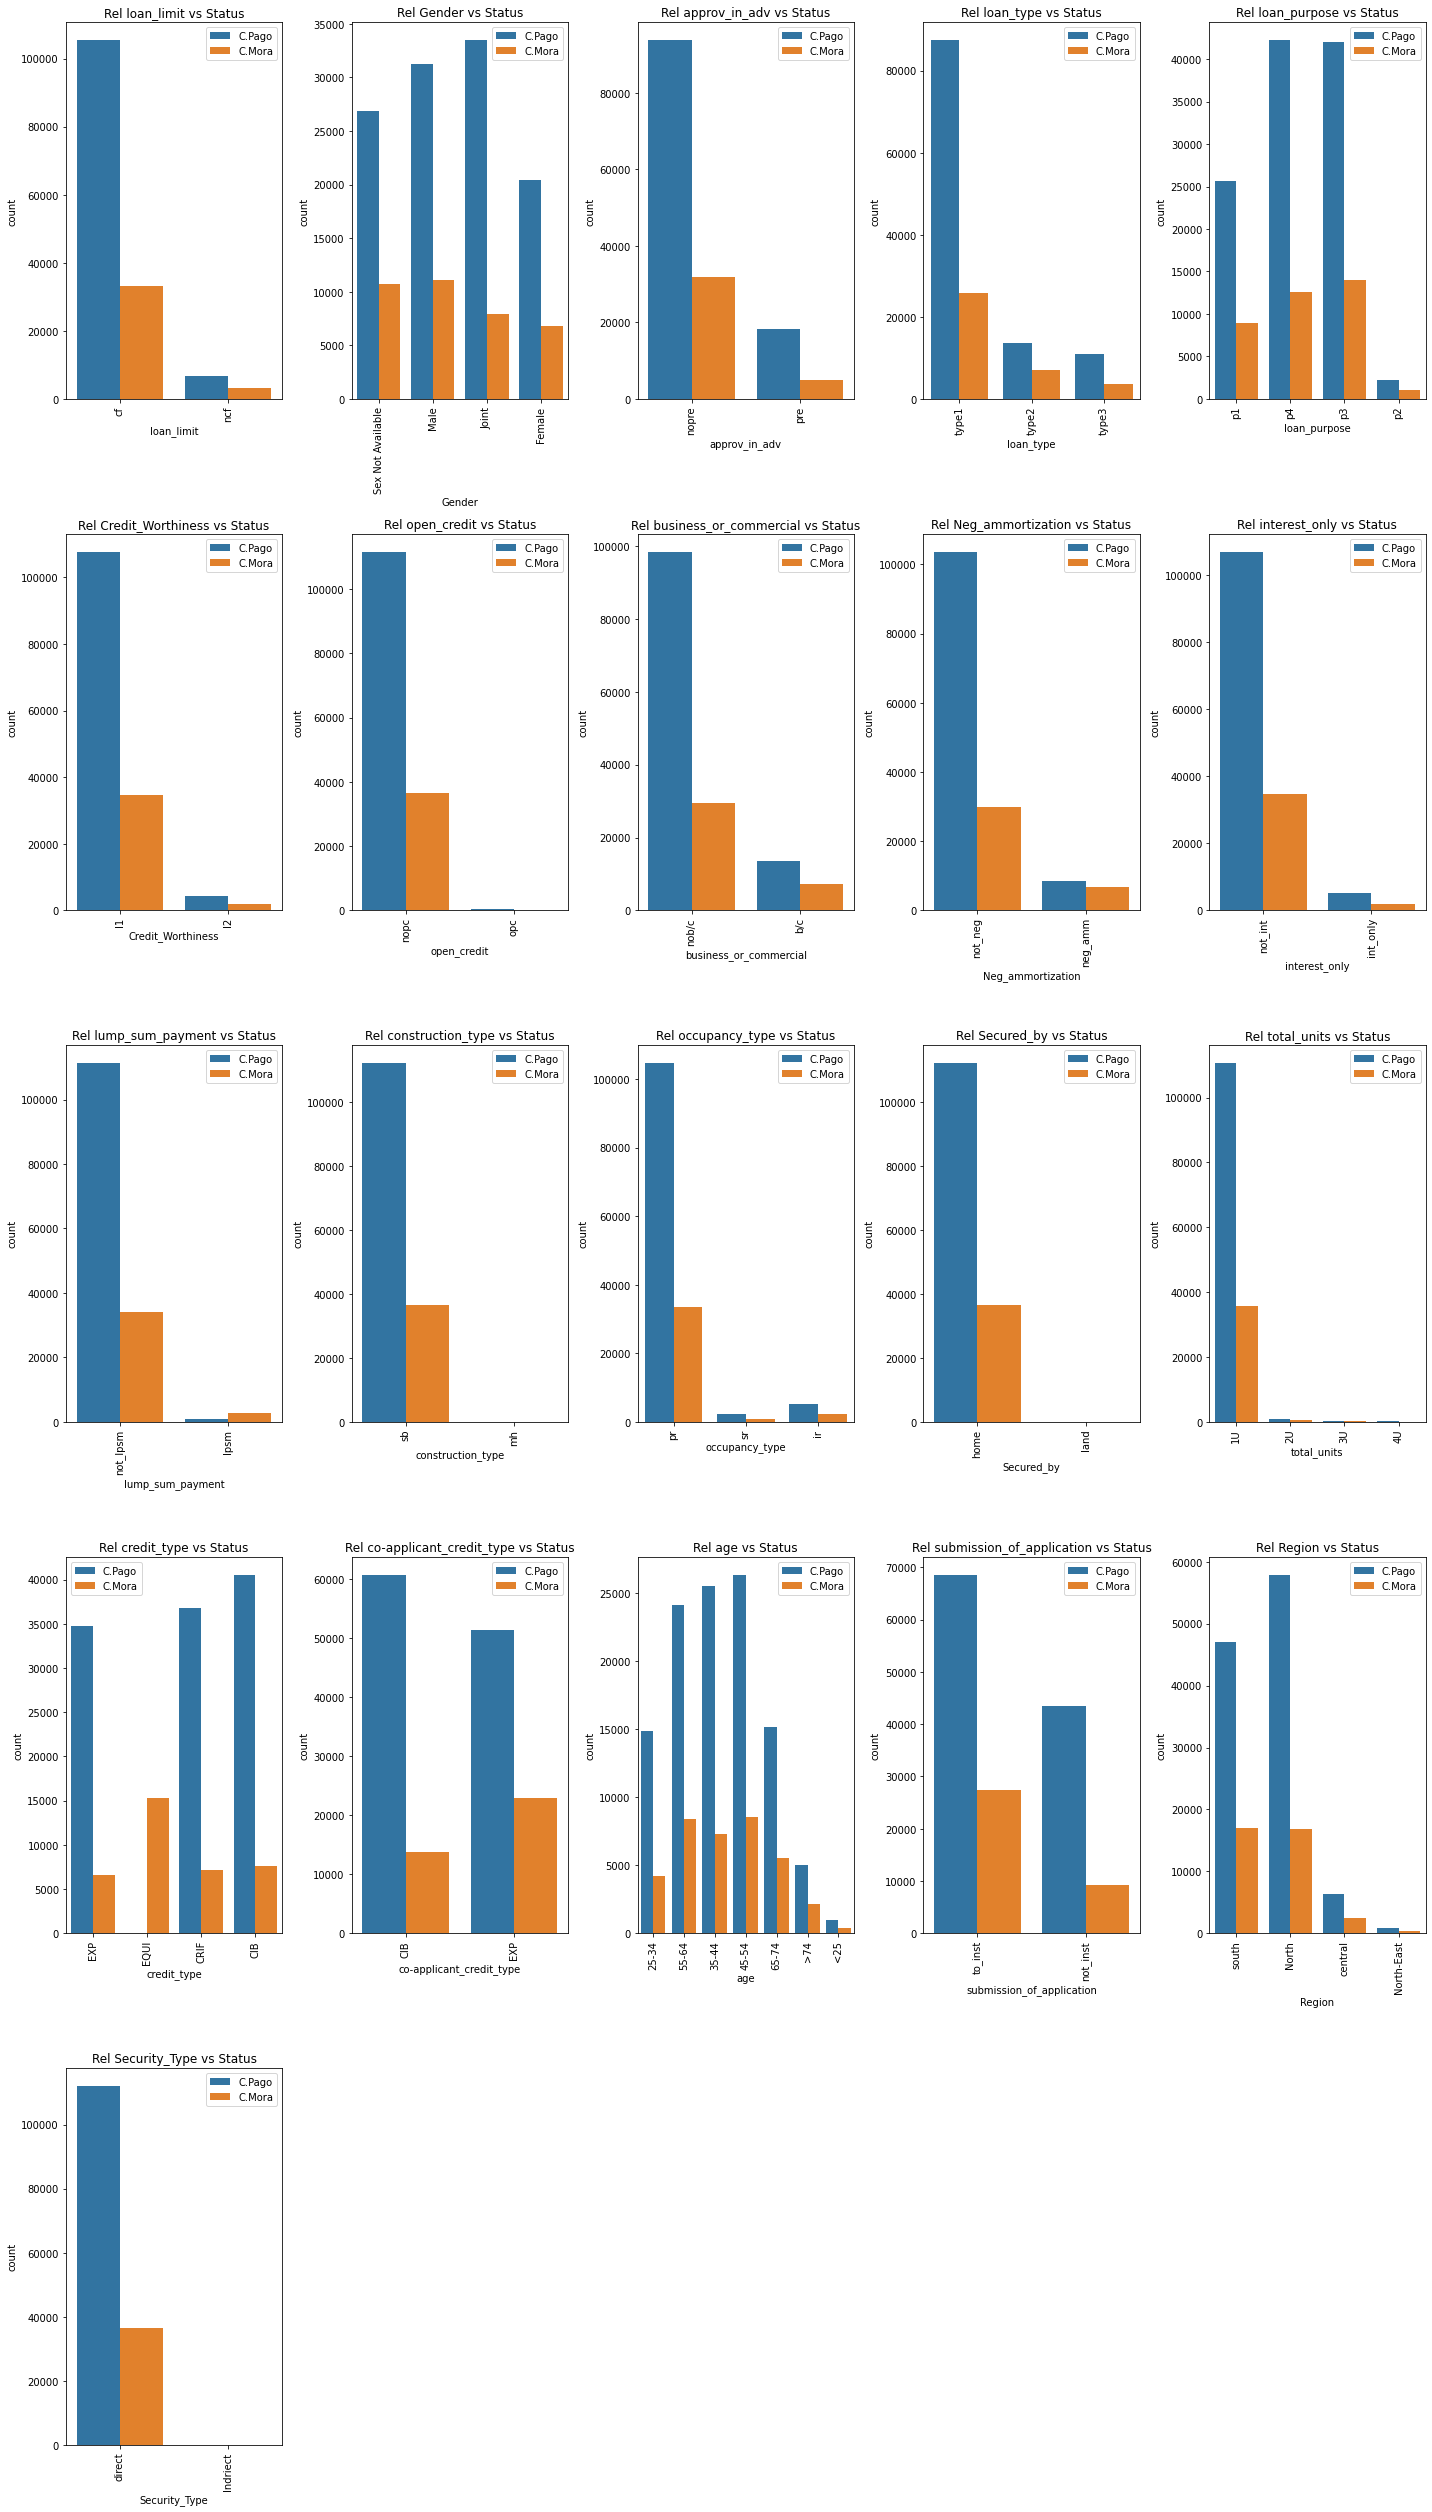

In [172]:
#Plot distributions of categorical features - CONSOLIDATED
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))


# # Plot relationships between categorical features and target variable - CONSOLIDADO. 
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(5, 5, i+1)
    #sns.boxplot(x='Status', y=col, data=datos_limpios)
    sns.countplot(x=col, hue='Status', data=datos_limpios)
    plt.title(f'Rel {col} vs Status')
    plt.xticks(rotation=90)
    
    plt.tight_layout()

    # Cambiar la leyenda para reflejar los textos descriptivos
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = ['C.Pago' if label == '0' else 'C.Mora' for label in labels]
    plt.legend(handles, labels)

plt.show()


## Tratamiento de valores atípicos o Outliers
Eliminar valores atípicos es una parte importante del preprocesamiento de datos, especialmente en aplicaciones como el credit scoring, donde los valores atípicos pueden distorsionar los resultados del modelo. 

Identificación de Valores Atípicos

#### Métodos Estadísticos
- Rango Intercuartílico (IQR): Los datos se consideran valores atípicos si están por debajo del primer cuartil (Q1) menos 1.5 veces el IQR o por encima del tercer cuartil (Q3) más 1.5 veces el IQR.
Fórmula:
Q1 = datos.quantile(0.25)
Q3 = datos.quantile(0.75)
IQR = Q3 - Q1
- Z-Score: Un valor se considera un valor atípico si su z-score es mayor que 3 o menor que -3.
Fórmula:
datos_sin_outliers = datos[(np.abs(stats.zscore(datos.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

#### Justificación para Eliminar Valores Atípicos
Mejora del Rendimiento del Modelo:
Los valores atípicos pueden sesgar las estimaciones del modelo y reducir su precisión.
Al eliminar valores atípicos, el modelo puede generalizar mejor los datos y mejorar su rendimiento en datos no vistos.

Reducción de la Varianza:
Los valores atípicos pueden aumentar la varianza del modelo, haciéndolo menos robusto.
Eliminar estos valores ayuda a estabilizar las estimaciones y reducir la varianza.

Simplificación del Modelo:
Los valores atípicos pueden complicar el modelo, haciendo que sea más difícil de interpretar y explicar.
Un conjunto de datos más limpio y sin valores atípicos permite construir modelos más simples y comprensibles.

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print(datos_limpios.dtypes)

loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object
submission_of_application     object
L

In [207]:
import pandas as pd
import numpy as np

# Cargar el conjunto de datos limpio
ruta_archivo = '/mnt/data/Loan_Default_Cleaned.csv'
datos = datos_limpios

# Verificar tipos de datos de las columnas
print("Tipos de datos antes de la conversión:")
print(datos.dtypes)

# Listado de columnas que deberían ser numéricas
columnas_a_convertir = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']

# Convertir las columnas a numéricas
for columna in columnas_a_convertir:
    datos[columna] = pd.to_numeric(datos[columna], errors='coerce')

# Verificar tipos de datos de las columnas después de la conversión
print("Tipos de datos después de la conversión:")
print(datos.dtypes)

# Eliminar filas con NaN después de la conversión
datos.dropna(subset=columnas_a_convertir, inplace=True)

# Asegurarnos de que todas las columnas numéricas sean realmente numéricas
columnas_numericas = datos.select_dtypes(include=[np.number]).columns
print("Columnas numéricas después de la limpieza:")
print(columnas_numericas)

# Verificar si aún hay columnas con tipo objeto y mostrar valores únicos para inspección
columnas_objeto = datos.select_dtypes(include=[object]).columns
for columna in columnas_objeto:
    print(f"Valores únicos en la columna {columna}:")
    print(datos[columna].unique())

# Identificar valores atípicos usando el método IQR
Q1 = datos[columnas_numericas].quantile(0.25)
Q3 = datos[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores atípicos
datos_sin_outliers = datos[~((datos[columnas_numericas] < (Q1 - 1.5 * IQR)) | (datos[columnas_numericas] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar la reducción en el número de filas
print("Número de filas antes de eliminar valores atípicos:", datos.shape[0])
print("Número de filas después de eliminar valores atípicos:", datos_sin_outliers.shape[0])

# Guardar el conjunto de datos sin outliers
ruta_archivo_sin_outliers = 'C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned_Sin_Outliers.csv'
datos_sin_outliers.to_csv(ruta_archivo_sin_outliers, index=False)

print("El conjunto de datos limpio sin outliers ha sido guardado en:", ruta_archivo_sin_outliers)


Tipos de datos antes de la conversión:
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object

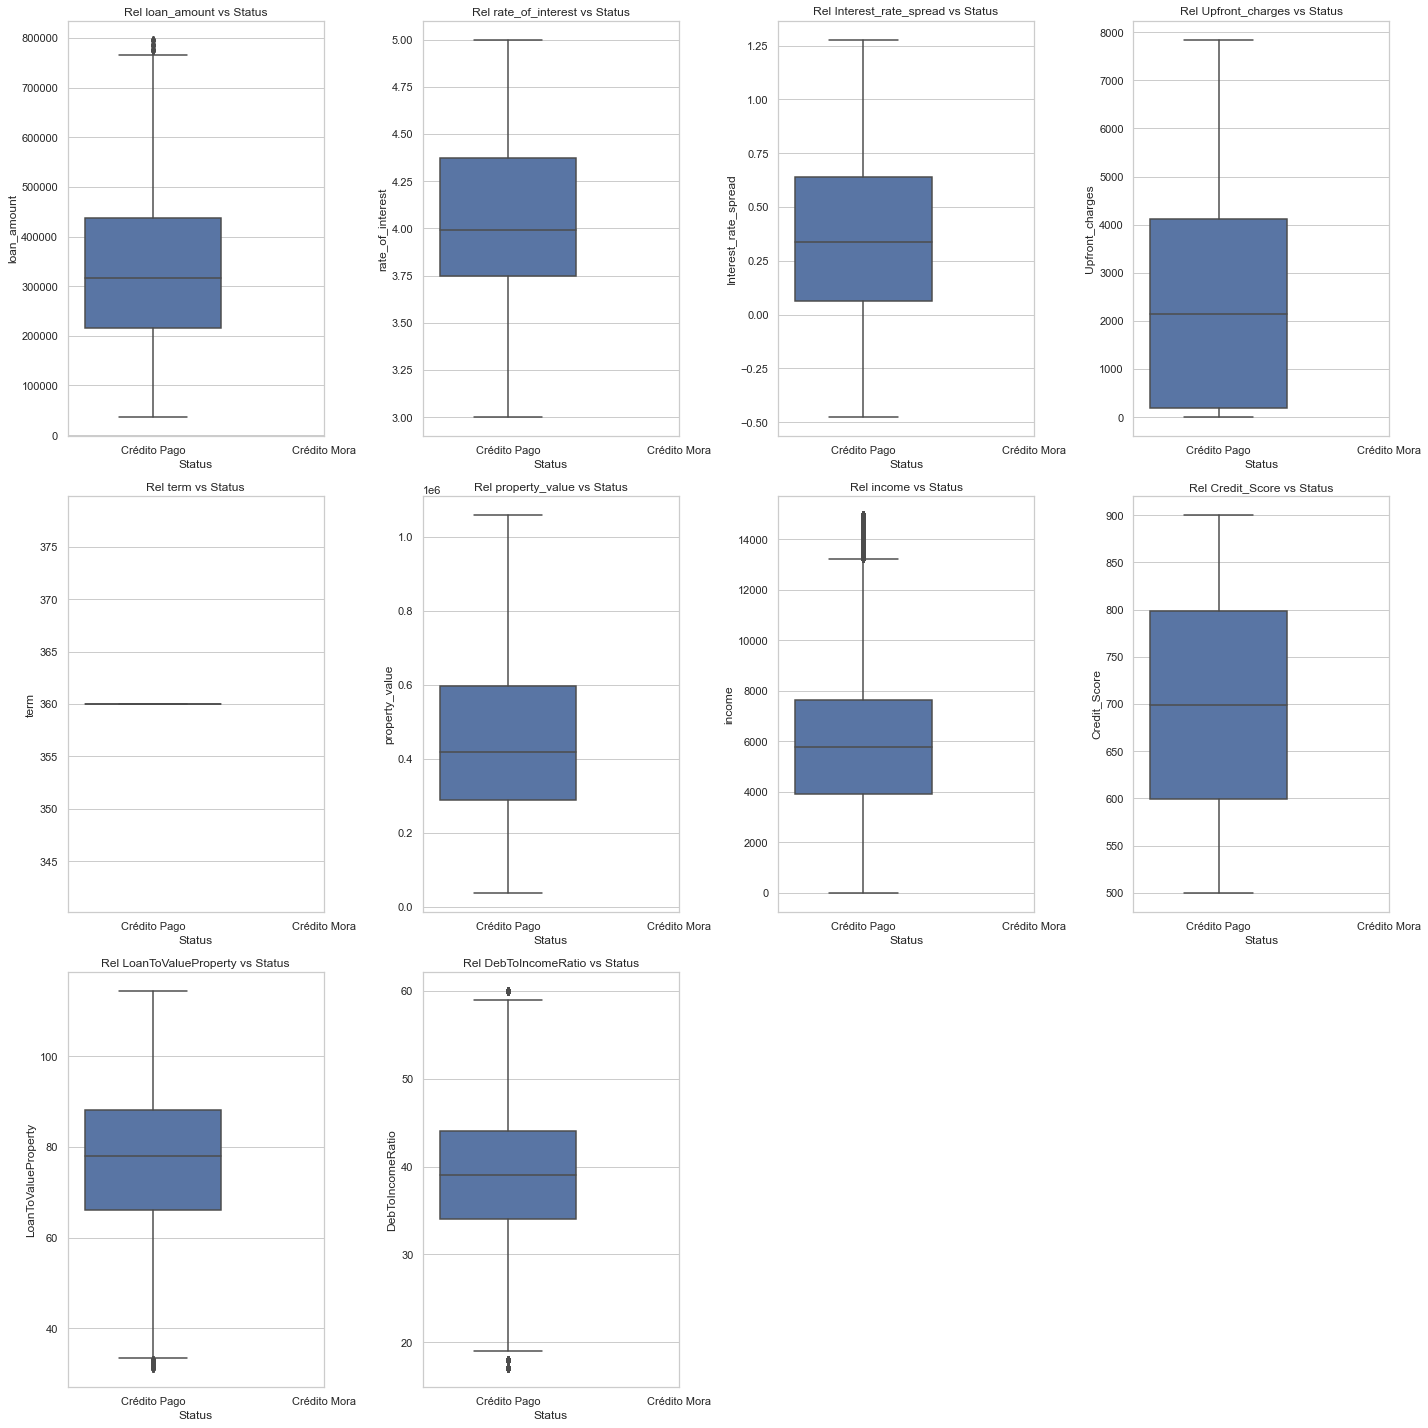

In [212]:
# Split data into features (X) and target (y)
X = datos_limpios.drop('Status', axis=1)
y = datos_limpios['Status'].astype(int)

# Combine X and y for visualization
data = X.copy()
data['Status'] = y

# Plot distributions of numerical features in a consolidated plot - CONSOLIDATED SIN OUTLINES. 
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Plot relationships between numerical features and target variable - CONSOLIDADO. SIN OUTLINERS
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

# Plot relationships between numerical features and the target variable 'Status'

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='Status', y=col, data=datos_sin_outliers)
    plt.title(f'Rel {col} vs Status')
    plt.xticks([0, 1], ['Crédito Pago', 'Crédito Mora'])
    plt.tight_layout()

plt.show()

Eliminar valores atípicos de manera demasiado agresiva puede llevar a la eliminación de datos críticos para el análisis, como todos los registros con un "status" específico. Esto puede ocurrir si los valores de esas filas se consideran atípicos en varias de las columnas numéricas.

Para abordar este problema, es importante:

- Verificar la distribución de la variable objetivo después de la eliminación de outliers para asegurarse de que no se ha distorsionado significativamente.
- Aplicar técnicas más robustas para la detección de outliers, que no eliminen todos los registros de una categoría crítica.
- Realizar la detección de outliers de manera condicional, es decir, considerar la variable objetivo al decidir qué valores son outliers.

- Al revisar los boxplot se identifican que todos los outliners se eliminan de aquellos registros que están por esta razon es necesario mejorar el tratamiento de los outliers

- Aplicar una técnica más robusta para la detección de outliers (por ejemplo, z-score condicional a la variable objetivo).


 1. Cargar y Preparar los Datos

In [226]:
#Cargar y preparar los datos 
import pandas as pd
import numpy as np

# Cargar el conjunto de datos limpio
#ruta_archivo = '/mnt/data/Loan_Default_Cleaned.csv'
#datos = pd.read_csv(ruta_archivo)
datos = datos_limpios

# Verificar tipos de datos de las columnas
print("Tipos de datos antes de la conversión:")
print(datos.dtypes)

# Listado de columnas que deberían ser numéricas
columnas_a_convertir = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']

# Convertir las columnas a numéricas
for columna in columnas_a_convertir:
    datos[columna] = pd.to_numeric(datos[columna], errors='coerce')

# Eliminar filas con NaN después de la conversión
datos.dropna(subset=columnas_a_convertir, inplace=True)

# Verificar la distribución de la variable objetivo
print("Distribución de la variable objetivo 'Status' antes de eliminar outliers:")
print(datos['Status'].value_counts())


Tipos de datos antes de la conversión:
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object

2. Aplicar una Técnica Robusta para la Detección de Outliers
Podemos usar el z-score condicional para detectar outliers, asegurándonos de no eliminar todos los registros de una categoría crítica.
A la vez que cuando es muy estricta la eliminación es necesario el ajuste del Umbral del Z-Score y Aplicación de la Eliminación de Outliers
Al ajustar el umbral del z-score a 3.5 para hacer la eliminación de outliers menos estricta y verificar las estadísticas descriptivas antes y después de la eliminación de outliers se concluye que aun así se eliminan la mayoria de los datos. 
Al parecer que hay un problema subyacente en los datos o en la forma en que se está calculando el z-score. Podemos probar un enfoque diferente para eliminar outliers que podría ser más robusto.

Enfoque Alternativo: Usar Percentiles para Identificar Outliers
En lugar de usar z-scores, podemos usar percentiles para identificar y eliminar outliers. Esto es menos sensible a la distribución de los datos y puede ser más efectivo en conjuntos de datos con distribuciones no normales.
Es necesario utilizar la técnica de percentiles, para que el modelo sea menos sensible 

In [228]:
from scipy.stats import zscore

# Asegurarnos de que todas las columnas numéricas sean realmente numéricas
columnas_numericas = datos.select_dtypes(include=[np.number]).columns

# Calcular el z-score condicional por cada grupo de 'Status'
def eliminar_outliers_grupo(df, columnas,umbral=3.5):
    dfs_sin_outliers = []
    for grupo, grupo_df in df.groupby('Status'):
        # Calcular el z-score para cada columna numérica
        z_scores = np.abs(grupo_df[columnas].apply(zscore))
        # Filtrar filas que no son outliers en ninguna columna numérica
        grupo_df_sin_outliers = grupo_df[(z_scores < 3).all(axis=1)]
        dfs_sin_outliers.append(grupo_df_sin_outliers)
    return pd.concat(dfs_sin_outliers)

# Aplicar la función para eliminar outliers condicionales
datos_sin_outliers = eliminar_outliers_grupo(datos, columnas_numericas)

# Verificar la distribución de la variable objetivo después de eliminar outliers
print("Distribución de la variable objetivo 'Status' después de eliminar outliers:")
print(datos_sin_outliers['Status'].value_counts())


# Estadísticas descriptivas antes de eliminar outliers
print("Estadísticas descriptivas antes de eliminar outliers:")
print(datos.describe())

# Estadísticas descriptivas después de eliminar outliers
print("Estadísticas descriptivas después de eliminar outliers:")
print(datos_sin_outliers.describe())

Distribución de la variable objetivo 'Status' después de eliminar outliers:
Series([], Name: count, dtype: int64)
Estadísticas descriptivas antes de eliminar outliers:
        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
count  1.486700e+05     148670.000000         148670.000000    148670.000000   
mean   3.311177e+05          4.031879              0.429024      3057.397919   
std    1.839093e+05          0.488348              0.445907      2797.972965   
min    1.650000e+04          0.000000             -3.638000         0.000000   
25%    1.965000e+05          3.750000              0.181500      1250.000000   
50%    2.965000e+05          3.990000              0.390400      2596.450000   
75%    4.365000e+05          4.250000              0.620000      3889.495000   
max    3.576500e+06          8.000000              3.357000     60000.000000   

                term  property_value         income   Credit_Score  \
count  148670.000000    1.486700e+05  148

3. Guardar el Dataset Limpio

In [230]:
# Guardar el conjunto de datos sin outliers
ruta_archivo_sin_outliers = path_archivos + '/Loan_Default_Cleaned_Sin_Outliers_Condicional.csv'
datos_sin_outliers.to_csv(ruta_archivo_sin_outliers, index=False)

print("El conjunto de datos limpio sin outliers ha sido guardado en:", ruta_archivo_sin_outliers)


El conjunto de datos limpio sin outliers ha sido guardado en: C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned_Sin_Outliers_Condicional.csv


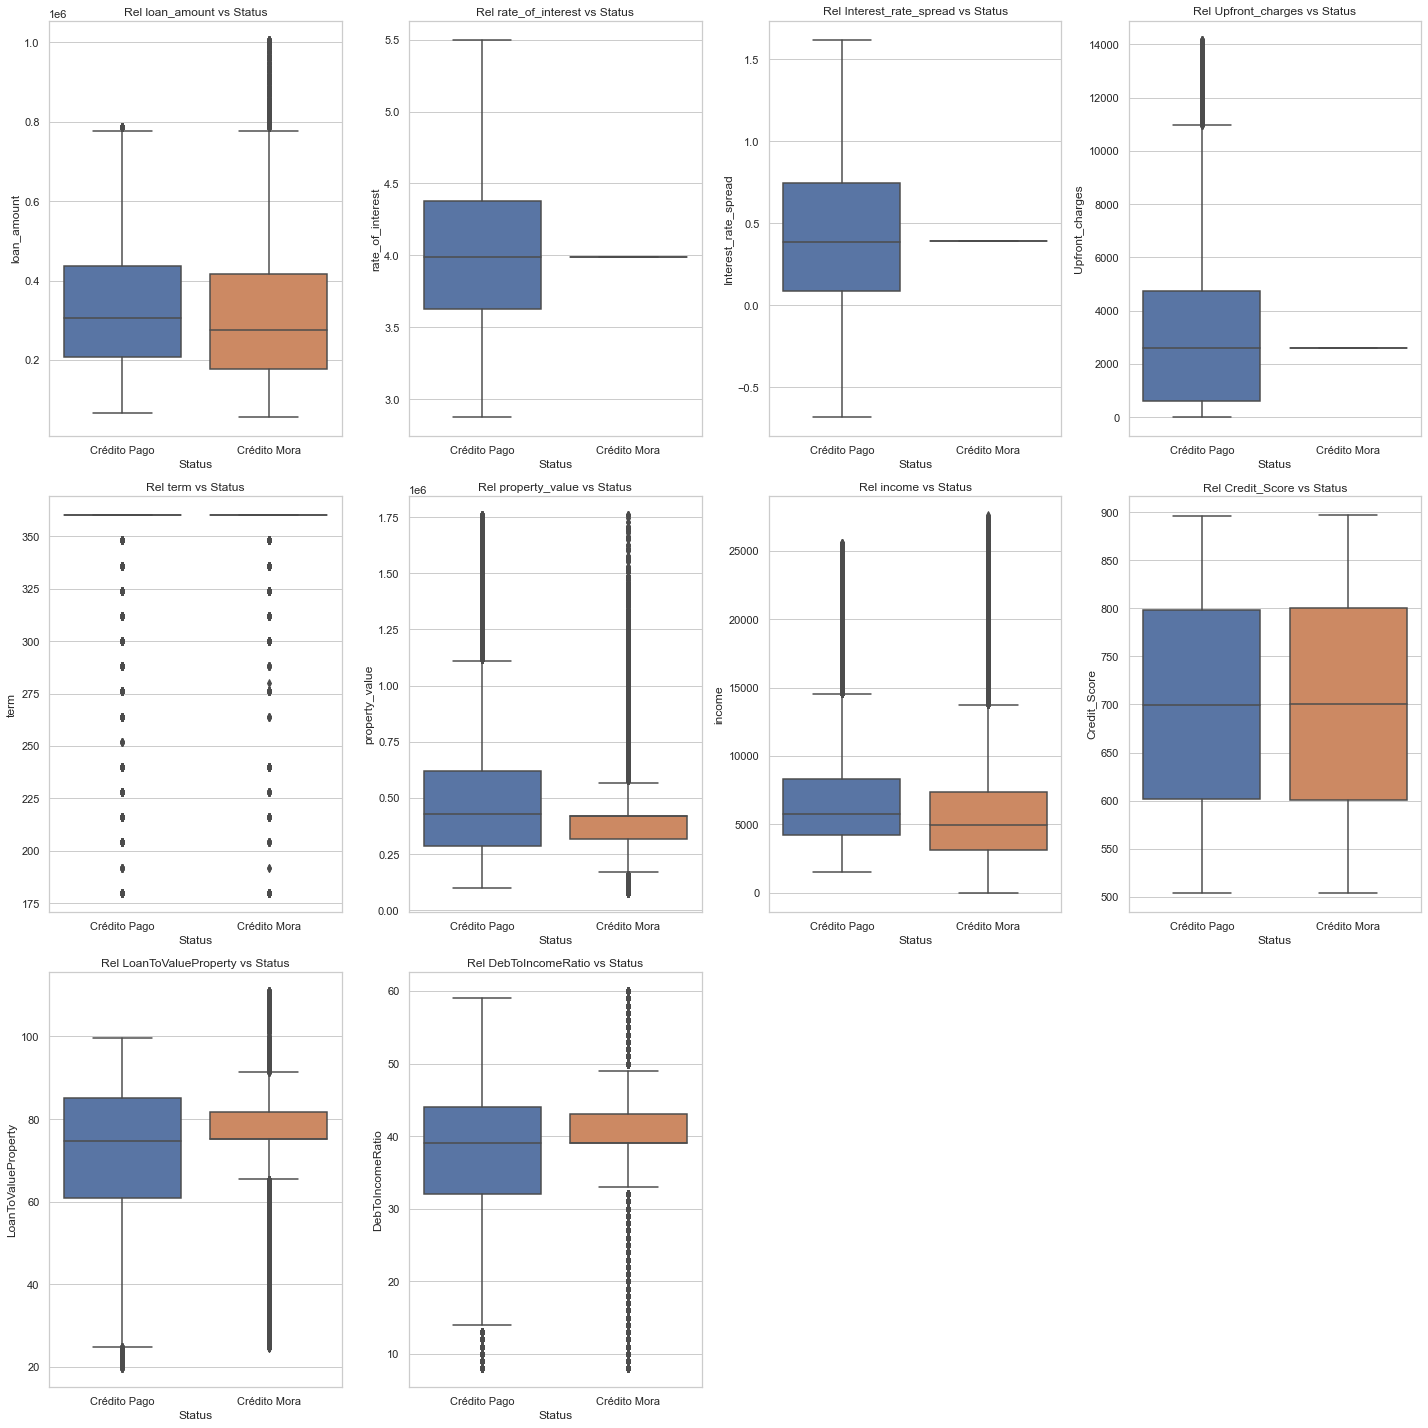

In [232]:
# Split data into features (X) and target (y)
X = datos_sin_outliers.drop('Status', axis=1)
y = datos_sin_outliers['Status'].astype(int)

# Combine X and y for visualization
data = X.copy()
data['Status'] = y

# Plot distributions of numerical features in a consolidated plot - CONSOLIDATED SIN OUTLINES. 
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Plot relationships between numerical features and target variable - CONSOLIDADO. SIN OUTLINERS
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

# Plot relationships between numerical features and the target variable 'Status'

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='Status', y=col, data=datos_sin_outliers)
    plt.title(f'Rel {col} vs Status')
    plt.xticks([0, 1], ['Crédito Pago', 'Crédito Mora'])
    plt.tight_layout()

plt.show()

### Matriz de correlación

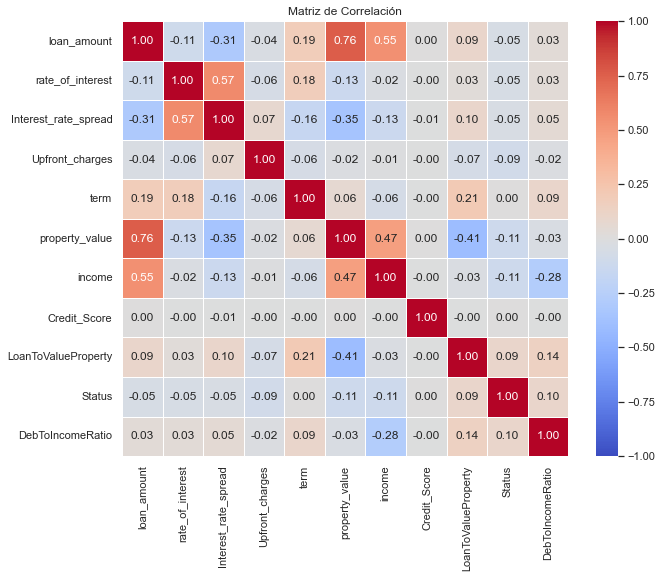

In [238]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
# Seleccionar columnas numéricas
columnas_numericas = datos_sin_outliers.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
# Calcular la matriz de correlación
corr_matrix = columnas_numericas.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


De acuerdo a la matriz de correlación, las variables con mayor relación tienen es el "property_value" con el "loan_amount", es decir la propiedad del valor con el monto del préstamo.
La siguiente relación es entre el "interes_rate_spread" con "rate_of_interest" que es la diferencia de interes con respecto al punto de referencia versus la tasa de interes. 


### Modelado de datos

Para proceder con la regresión logística, realizaremos los siguientes pasos:

- Codificar las variables categóricas: Convertir las variables categóricas en variables numéricas utilizando la codificación one-hot.
- Dividir los datos: Separar los datos en conjuntos de entrenamiento y prueba.
- Ajustar el modelo de regresión logística: Entrenar el modelo con los datos de entrenamiento.
- Evaluar el modelo: Analizar el rendimiento del modelo utilizando el conjunto de prueba y métricas de evaluación como la matriz de confusión, precisión, recall y AUC-ROC.

In [240]:
#Codificación de las variables categóricas

# Mostrar las primeras filas del dataframe para explorar su contenido
datos_sin_outliers.head(), datos_sin_outliers.info(), datos_sin_outliers.describe()

from sklearn.preprocessing import OneHotEncoder


# Seleccionar las variables predictoras y la variable objetivo
X = datos_sin_outliers.drop('Status', axis=1)
y = datos_sin_outliers['Status']

# Identificar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Codificar las variables categóricas usando OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Añadir las variables numéricas al dataframe codificado
numeric_cols = X.select_dtypes(exclude=['object']).columns
X_encoded[numeric_cols] = X[numeric_cols].reset_index(drop=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Mostrar la forma de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 130654 entries, 2 to 148663
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 130654 non-null  object 
 1   Gender                     130654 non-null  object 
 2   approv_in_adv              130654 non-null  object 
 3   loan_type                  130654 non-null  object 
 4   loan_purpose               130654 non-null  object 
 5   Credit_Worthiness          130654 non-null  object 
 6   open_credit                130654 non-null  object 
 7   business_or_commercial     130654 non-null  object 
 8   loan_amount                130654 non-null  int64  
 9   rate_of_interest           130654 non-null  float64
 10  Interest_rate_spread       130654 non-null  float64
 11  Upfront_charges            130654 non-null  float64
 12  term                       130654 non-null  float64
 13  Neg_ammortization          130654 

Hemos codificado las variables categóricas y dividido los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento tiene 91,457 registros y 48 columnas, mientras que el conjunto de prueba tiene 39,197 registros y las mismas 48 columnas.

Codificación de Variables Categóricas: Se utiliza OneHotEncoder para convertir las variables categóricas en variables dummy (0 o 1). Esto es necesario porque los modelos de aprendizaje automático no pueden trabajar directamente con variables categóricas.

Interpretación de los Datos Resultantes
Forma de X_train y X_test:

X_train tiene 91,457 registros y 48 columnas.
X_test tiene 39,197 registros y 48 columnas.
Cada columna en X_train y X_test representa una variable predictora. Las 48 columnas incluyen tanto las variables numéricas originales como las variables categóricas codificadas.
Forma de y_train y y_test:

y_train y y_test contienen la variable objetivo para los conjuntos de entrenamiento y prueba, respectivamente.
y_train tiene 91,457 valores y y_test tiene 39,197 valores, cada uno correspondiente a un registro en X_train y X_test.

Comentarios

- Codificación One-Hot: La codificación de variables categóricas es crucial para que los modelos de aprendizaje automático puedan utilizar esta información. Cada categoría única de una variable categórica se convierte en una columna separada con valores binarios (0 o 1).

- Balance de Clases: Al entrenar un modelo de regresión logística, es importante considerar el balance de clases en la variable objetivo. Si una clase está subrepresentada (como en este caso, los préstamos en mora), puede ser necesario utilizar técnicas de sobremuestreo, submuestreo o ajuste de los pesos de las clases para mejorar el rendimiento del modelo.

- División de Datos: La división en conjuntos de entrenamiento y prueba permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento, proporcionando una medida más realista de su desempeño.



Matriz de Confusión (Modelo Base):
[[29229     0]
 [ 9929    39]]

Informe de Clasificación (Modelo Base):
              precision    recall  f1-score   support

           0       0.75      1.00      0.85     29229
           1       1.00      0.00      0.01      9968

    accuracy                           0.75     39197
   macro avg       0.87      0.50      0.43     39197
weighted avg       0.81      0.75      0.64     39197


ROC-AUC (Modelo Base): 0.61


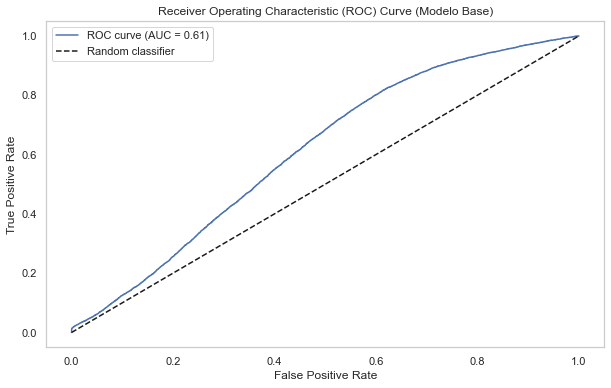

In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data = datos_sin_outliers

# Seleccionar las variables predictoras y la variable objetivo
X = data.drop('Status', axis=1)
y = data['Status']

# Identificar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Codificar las variables categóricas usando OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Añadir las variables numéricas al dataframe codificado
numeric_cols = X.select_dtypes(exclude=['object']).columns
X_encoded[numeric_cols] = X[numeric_cols].reset_index(drop=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión logística sin ajuste de pesos de clases
logreg_base = LogisticRegression(max_iter=1000)
logreg_base.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_base = logreg_base.predict(X_test)
y_pred_proba_base = logreg_base.predict_proba(X_test)[:, 1]

# Evaluar el modelo base
conf_matrix_base = confusion_matrix(y_test, y_pred_base)
class_report_base = classification_report(y_test, y_pred_base)
roc_auc_base = roc_auc_score(y_test, y_pred_proba_base)
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_pred_proba_base)

# Mostrar los resultados del modelo base
print("Matriz de Confusión (Modelo Base):")
print(conf_matrix_base)
print("\nInforme de Clasificación (Modelo Base):")
print(class_report_base)
print(f"\nROC-AUC (Modelo Base): {roc_auc_base:.2f}")

# Graficar la curva ROC para el modelo base
plt.figure(figsize=(10, 6))
plt.plot(fpr_base, tpr_base, label=f'ROC curve (AUC = {roc_auc_base:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Modelo Base)')
plt.legend(loc='best')
plt.grid()
plt.show()


#### Interpretación de Resultados

Matriz de Confusión:

29229 Verdaderos Negativos (TN): El modelo predijo correctamente 29,229 préstamos no en mora.
0 Falsos Positivos (FP): El modelo no predijo incorrectamente ningún préstamo en mora como no en mora.
9929 Falsos Negativos (FN): El modelo predijo incorrectamente 9,929 préstamos en mora como no en mora.
39 Verdaderos Positivos (TP): El modelo predijo correctamente solo 39 préstamos en mora.

Informe de Clasificación:
Precisión (Precision):
    Clase 0 (No en Mora): 0.75
    Clase 1 (En Mora): 1.00
Recall:
    Clase 0 (No en Mora): 1.00
    Clase 1 (En Mora): 0.00
F1-Score:
    Clase 0 (No en Mora): 0.85
    Clase 1 (En Mora): 0.01
Exactitud General (Accuracy): 0.75
Promedio Ponderado (Weighted Average):
    Precisión: 0.81
    Recall: 0.75
    F1-Score: 0.64

ROC-AUC:
    Un AUC de 0.612 indica que el modelo tiene una capacidad moderada para discriminar entre las clases, pero no es muy efectivo.

Comentarios
- Desbalanceo de Clases:
El modelo está sesgado hacia la clase mayoritaria (no en mora), con un recall perfecto (1.00) para esta clase y un recall extremadamente bajo (0.00) para la clase minoritaria (en mora).
La precisión para la clase en mora es alta (1.00), pero esto se debe a que el modelo casi nunca predice que un préstamo está en mora.

- Evaluación del Modelo:
La matriz de confusión muestra que el modelo es incapaz de identificar correctamente los préstamos en mora.
El informe de clasificación refuerza este punto con un F1-Score muy bajo para la clase en mora.
El AUC-ROC confirma que el modelo no tiene una buena capacidad de discriminación para la clase minoritaria.

Conclusiones
- Necesidad de Ajustes:
Es esencial aplicar técnicas para manejar el desbalanceo de clases, como SMOTE o ajustar los pesos de las clases, para mejorar la capacidad del modelo de identificar correctamente los préstamos en mora.
- Próximos Pasos:
Implementar SMOTE para aumentar el número de muestras de la clase minoritaria.
Ajustar los pesos de las clases en el modelo de regresión logística para que preste más atención a la clase minoritaria

Matriz de Confusión (Pesos Ajustados):
[[15258 13971]
 [ 3464  6504]]

Informe de Clasificación (Pesos Ajustados):
              precision    recall  f1-score   support

           0       0.81      0.52      0.64     29229
           1       0.32      0.65      0.43      9968

    accuracy                           0.56     39197
   macro avg       0.57      0.59      0.53     39197
weighted avg       0.69      0.56      0.58     39197


ROC-AUC (Pesos Ajustados): 0.60


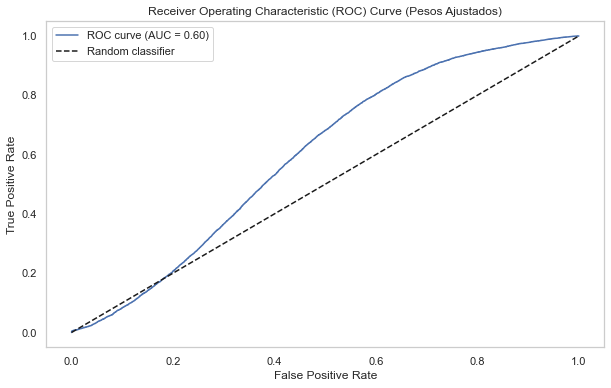

Matriz de Confusión (SMOTE):
[[15298 13931]
 [ 3452  6516]]

Informe de Clasificación (SMOTE):
              precision    recall  f1-score   support

           0       0.82      0.52      0.64     29229
           1       0.32      0.65      0.43      9968

    accuracy                           0.56     39197
   macro avg       0.57      0.59      0.53     39197
weighted avg       0.69      0.56      0.58     39197


ROC-AUC (SMOTE): 0.60


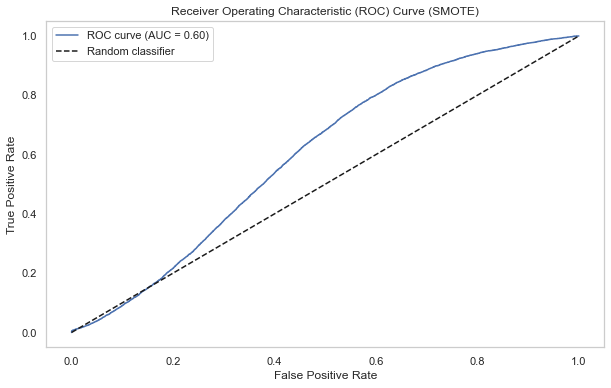

In [253]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

data = datos_sin_outliers

# Seleccionar las variables predictoras y la variable objetivo
X = data.drop('Status', axis=1)
y = data['Status']

# Identificar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Codificar las variables categóricas usando OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Añadir las variables numéricas al dataframe codificado
numeric_cols = X.select_dtypes(exclude=['object']).columns
X_encoded[numeric_cols] = X[numeric_cols].reset_index(drop=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión logística con ajuste de pesos de clases
logreg_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_weighted.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_weighted = logreg_weighted.predict(X_test)
y_pred_proba_weighted = logreg_weighted.predict_proba(X_test)[:, 1]

# Evaluar el modelo con pesos ajustados
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)
roc_auc_weighted = roc_auc_score(y_test, y_pred_proba_weighted)
fpr_weighted, tpr_weighted, thresholds_weighted = roc_curve(y_test, y_pred_proba_weighted)

# Mostrar los resultados del modelo con pesos ajustados
print("Matriz de Confusión (Pesos Ajustados):")
print(conf_matrix_weighted)
print("\nInforme de Clasificación (Pesos Ajustados):")
print(class_report_weighted)
print(f"\nROC-AUC (Pesos Ajustados): {roc_auc_weighted:.2f}")

# Graficar la curva ROC para el modelo con pesos ajustados
plt.figure(figsize=(10, 6))
plt.plot(fpr_weighted, tpr_weighted, label=f'ROC curve (AUC = {roc_auc_weighted:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Pesos Ajustados)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ajustar el modelo de regresión logística con los datos resampleados
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_resampled, y_train_resampled)

# Predecir con el conjunto de prueba
y_pred_smote = logreg_smote.predict(X_test)
y_pred_proba_smote = logreg_smote.predict_proba(X_test)[:, 1]

# Evaluar el modelo con SMOTE
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_proba_smote)
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_proba_smote)

# Mostrar los resultados del modelo con SMOTE
print("Matriz de Confusión (SMOTE):")
print(conf_matrix_smote)
print("\nInforme de Clasificación (SMOTE):")
print(class_report_smote)
print(f"\nROC-AUC (SMOTE): {roc_auc_smote:.2f}")

# Graficar la curva ROC para el modelo con SMOTE
plt.figure(figsize=(10, 6))
plt.plot(fpr_smote, tpr_smote, label=f'ROC curve (AUC = {roc_auc_smote:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SMOTE)')
plt.legend(loc='best')
plt.grid()
plt.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the CSV file
#file_path = '/mnt/data/Loan_Default.csv'
loan_default_df=df
#pd.read_csv("C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\loan_default.csv", sep=',', on_bad_lines='skip')
#loan_default_df = pd.read_csv(file_path)



# Drop rows with missing target 'Status'
loan_default_df = loan_default_df.dropna(subset=['Status'])

# Split data into features (X) and target (y)
X = loan_default_df.drop('Status', axis=1)
y = loan_default_df['Status'].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and evaluate the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

# Fit the model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     22494
           1       0.95      0.49      0.65      7240

    accuracy                           0.87     29734
   macro avg       0.90      0.74      0.78     29734
weighted avg       0.88      0.87      0.85     29734

Confusion Matrix:
 [[22295   199]
 [ 3692  3548]]


Interpretación:
Precisión para la clase 0 (sin valor predeterminado): 0,86
Recordatorio para clase 0: 0,99
Precisión para clase 1 (predeterminada): 0,95
Recordatorio para la clase 1: 0,49
El modelo tiene alta precisión y recuperación para predecir incumplimientos (clase 0), pero menor recuperación para predecir incumplimientos (clase 1). Esto indica que, si bien es bueno para identificar correctamente los incumplimientos, pasa por alto un número significativo de incumplimientos reales.